<a href="https://colab.research.google.com/github/datagrad/Learning-Python/blob/main/1_Basic_Statistics_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Central Tendency and Dispersion

Central Tendency and dispersion are the concepts used to check the data distribution.
The distribution of dat can be examined in three step exploration:


1.   Local Concentration:
      This involves checking the basic statistical figure like **Mean, Median, Mode, Quartile, Percentile**.



2.   Dispersion: 
      This involves checking the data dispersion from the local concentration point. **Standard Deviation and Variance** are the measures used to check dispersion.

3.   Shape:
      This involves checking how data is distributed around Local Concentration Points using plot. This is done by **Skewness and Kurtosis** check.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datagrad/Learning-Python/main/Marks%20Data.csv')
df.head()

,Roll_Code,Math,English,Science,Hindi,Social,Total,Year,Sports,Acting,Hostler,Previous_Grade,Attandence,Tuition
0,2019_A10001,66,72,88,69,69,364,2019,Football,Yes,Yes,E,87,Yes
1,2018_A10002,49,38,22,89,66,264,2018,Hockey,Yes,No,C,90,Yes
2,2021_A10003,7,73,35,79,54,248,2021,Tennis,No,No,C,94,Partially
3,2021_B10004,17,79,73,72,86,327,2021,Hockey,Yes,Yes,E,83,Partially
4,2018_A10005,35,48,61,94,87,325,2018,Tennis,Yes,Yes,E,96,Yes


## 2. Describe

In [3]:
df.describe()

,Math,English,Science,Hindi,Social,Total,Year,Attandence
count,12294.000000,12294.000000,12294.000000,12294.000000,12294.000000,12294.000000,12294.000000,12294.000000
mean,66.963803,61.821295,58.465512,82.021311,71.291443,340.563364,2019.209696,84.019115
std,27.109230,22.338289,18.695362,10.075774,16.440751,46.491375,1.607541,9.598304
min,0.000000,11.000000,21.000000,65.000000,43.000000,171.000000,2017.000000,68.000000
25%,50.000000,48.000000,44.000000,73.000000,57.000000,312.000000,2018.000000,76.000000
50%,77.000000,64.000000,58.000000,82.000000,71.000000,346.000000,2019.000000,84.000000
75%,87.000000,80.000000,72.000000,91.000000,85.000000,374.000000,2021.000000,92.000000
max,100.000000,97.000000,99.000000,99.000000,99.000000,467.000000,2021.000000,100.000000


## 3. Local Concentration

### Mean

In [4]:
from statistics import mean

a1 = df['Total'].mean() # pandas function
a2 = mean(df['Total'])  # statistics function
a3 = np.mean(df['Total']) # numpy mean

print(f'{a1}, {a2}, {a3}')

340.56336424272, 340.56336424272, 340.56336424272


### Mode

In [5]:
from statistics import mode
from scipy import stats

a1 = df['Total'].mode() # pandas function
#a2 = mode(df['Total'])  # statistics function
a3 = stats.mode(df['Total']) # stats function

print(f'{a1}, {a3}')

0    351
dtype: int64, ModeResult(mode=array([351]), count=array([127]))


### Median

In [6]:
from statistics import median

a1 = df['Total'].median() # pandas function
a2 = median(df['Total'])  # statistics function
a3 = np.median(df['Total']) # numpy function

print(f'{a1}, {a2}, {a3}')

346.0, 346.0, 346.0


### Quartile

In [7]:
Q1 = np.percentile(df["Total"], 25)
Q2 = np.percentile(df["Total"], 50)
Q3 = np.percentile(df["Total"], 75)

print("1st Quartile: ",Q1)
print("2nd Quartile: ",Q2)
print("3rd Quartile: ",Q3)



1st Quartile:  312.0
2nd Quartile:  346.0
3rd Quartile:  374.0


### Percentile


In [8]:
P90th = np.percentile(df["Total"], 90)


print("90th percentile: ",P90th)

90th percentile:  396.0


In [9]:
P10th = np.percentile(df["Total"], 10)


print("10th percentile: ",P10th)

10th percentile:  275.0


## 4. Dispersion

### Standard Deviation

In [10]:
from statistics import stdev

a1 = df['Total'].std() # pandas function
a2 = stdev(df['Total'])  # statistics function
a3 = np.std(df['Total']) # numpy function

print(f'{a1}, {a2}, {a3}')

46.491375435153394, 46.49137543515301, 46.48948458104238


### Variance

In [11]:
from statistics import variance

a1 = df['Total'].var() # pandas function
a2 = variance(df['Total'])  # statistics function
a3 = np.var(df['Total']) # numpy function

print(f'{a1}, {a2}, {a3}')

2161.447989852384, 2161.4479898523487, 2161.2721766109776


## 5. Shape

### Skewness

In [12]:
from scipy.stats import skew

a1 = df['Total'].skew() # pandas function
a2 = skew(df['Total'])  # scipy stats

print(a1, a2)

-0.5087494584208861 -0.5086873834206574


### Kurtosis

In [13]:
from scipy.stats import kurtosis

a1 = df['Total'].kurt() # pandas function
a2 = kurtosis(df['Total'])  # scipy stats

print(a1, a2)

-0.009985681320738404 -0.010469623835420272


## 6. Visualization

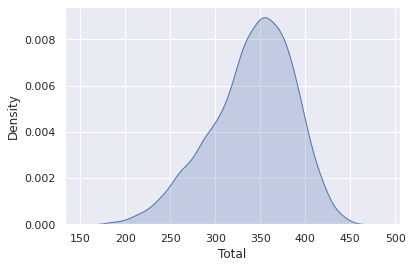

In [14]:
# Density Plot

import seaborn as sns

sns.set(color_codes=True)

sns.kdeplot(df['Total'], shade=True)


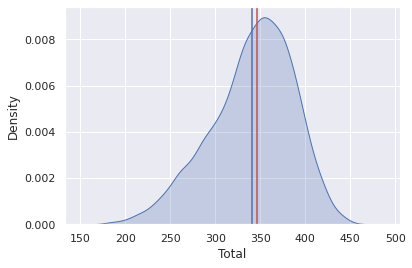

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

sns.kdeplot(df['Total'], shade=True)

plt.axvline(df['Total'].mean(), 0, 1)                         # Darw Mean Line
plt.axvline(df['Total'].median(), 0, 1, color='r')            # Darw Median Line


In [16]:
# Insert 25 percentile and 75 percentile Line
result = df.describe()
result.Total                        # Created result df with values

count    12294.000000
mean       340.563364
std         46.491375
min        171.000000
25%        312.000000
50%        346.000000
75%        374.000000
max        467.000000
Name: Total, dtype: float64

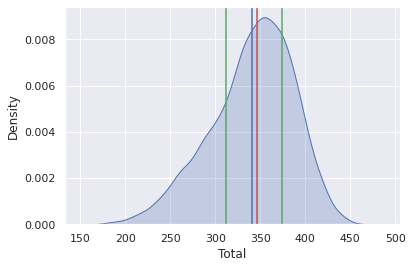

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

sns.kdeplot(df['Total'], shade=True)

plt.axvline(df['Total'].mean(), 0, 1)                         # Darw Mean Line
plt.axvline(df['Total'].median(), 0, 1, color='r')            # Darw Median Line

plt.axvline(result['Total']['25%'], 0, 1, color='g')            # Darw 25 Percentile Line
plt.axvline(result['Total']['75%'], 0, 1, color='g')            # Darw 75th Percentile Line

In [18]:
# Upper and Lower Outliners 

# IQR=Q3-Q1
IQR = result['Total']['75%']-result['Total']['25%']


# Upper Outliner = Q3 + (1.5*IQR)
upper_Outliner = result['Total']['75%']+(1.5*IQR)

# Lower Outliner = Q1 - (1.5*IQR)
lower_Outliner = result['Total']['25%']-(1.5*IQR)


print(lower_Outliner)
print(upper_Outliner)



219.0
467.0


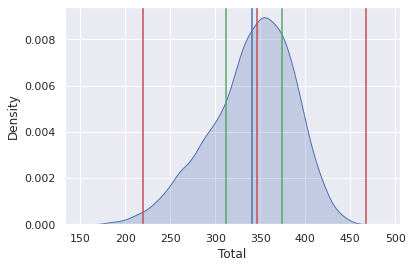

In [19]:


import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

sns.kdeplot(df['Total'], shade=True)

plt.axvline(df['Total'].mean(), 0, 1)                         # Darw Mean Line
plt.axvline(df['Total'].median(), 0, 1, color='r')            # Darw Median Line

plt.axvline(result['Total']['25%'], 0, 1, color='g')            # Darw 25 Percentile Line
plt.axvline(result['Total']['75%'], 0, 1, color='g')            # Darw 75th Percentile Line

plt.axvline(upper_Outliner, 0, 1, color ='r')                  # Upper Outliner
plt.axvline(lower_Outliner, 0, 1, color ='r')                  # Lower Outliner